In [1]:
#installing necessary libraries
#pip install pandas 
#pip install -U scikit-learn

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
#read the data file
df = pd.read_csv(r"C:\Users\Evah\Desktop\Lucy\bank_data.csv")

In [4]:
#view/undersatnd dataset
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [5]:
#get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [6]:
#drop missing values
df.dropna()
#drop unwanted columns
df.drop(["Unnamed: 0", "Purpose"], axis=1, inplace = True)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,male,2,own,NaN,little,1169,6
1,22,female,2,own,little,moderate,5951,48
2,49,male,1,own,little,NaN,2096,12
3,45,male,2,free,little,little,7882,42
4,53,male,2,free,little,little,4870,24
...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12
996,40,male,3,own,little,little,3857,30
997,38,male,2,own,little,NaN,804,12
998,23,male,2,free,little,little,1845,45


In [7]:
#converting qualitative variables into quantitave


lb_make = LabelEncoder()

df["Sex"] = lb_make.fit_transform(df["Sex"])
df["Job"] = lb_make.fit_transform(df["Job"])
df["Housing"] = lb_make.fit_transform(df["Housing"])
df["Saving accounts"] = lb_make.fit_transform(df["Saving accounts"])
df["Checking account"] = lb_make.fit_transform(df["Checking account"])

df.head(100)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,1,2,1,4,0,1169,6
1,22,0,2,1,0,1,5951,48
2,49,1,1,1,0,3,2096,12
3,45,1,2,0,0,0,7882,42
4,53,1,2,0,0,0,4870,24
...,...,...,...,...,...,...,...,...
95,58,1,2,2,0,1,15945,54
96,61,0,2,1,4,3,2012,12
97,34,1,2,1,1,1,2622,18
98,36,1,2,1,0,1,2337,36


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int32
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int32
 4   Saving accounts   1000 non-null   int32
 5   Checking account  1000 non-null   int32
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
dtypes: int32(4), int64(4)
memory usage: 47.0 KB


In [9]:
#view descriptive statistics
df.describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,0.690000,1.904000,1.071000,1.105000,1.577000,3271.258000,20.903000
std,11.375469,0.462725,0.653614,0.531264,1.580023,1.257638,2822.736876,12.058814
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,4.000000
25%,27.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1365.500000,12.000000
50%,33.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2319.500000,18.000000
75%,42.000000,1.000000,2.000000,1.000000,2.000000,3.000000,3972.250000,24.000000
max,75.000000,1.000000,3.000000,2.000000,4.000000,3.000000,18424.000000,72.000000


The means represents teh averrrage amountrs across the features  
The standard deviation tells the average amount of variability in the dataset
Min represents the smallest value and Max the largest value
The percentiles indicate the values below which a given percentage of oobservations in a group of observations fall

In [10]:
#Co-relation coefficients of the features
df.corr()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
Age,1.000000,0.161694,0.015673,-0.301419,0.084245,0.059751,0.032716,-0.036136
Sex,0.161694,1.000000,0.070298,-0.219844,0.034982,0.025578,0.093482,0.081432
Job,0.015673,0.070298,1.000000,-0.107191,0.011709,0.040663,0.285385,0.210910
Housing,-0.301419,-0.219844,-0.107191,1.000000,-0.006505,-0.022424,-0.135632,-0.157049
Saving accounts,0.084245,0.034982,0.011709,-0.006505,1.000000,0.222867,0.064630,0.047661
Checking account,0.059751,0.025578,0.040663,-0.022424,0.222867,1.000000,-0.042705,-0.072013
Credit amount,0.032716,0.093482,0.285385,-0.135632,0.064630,-0.042705,1.000000,0.624984
Duration,-0.036136,0.081432,0.210910,-0.157049,0.047661,-0.072013,0.624984,1.000000


Possible values of the correlation coefficient range from -1 to +1, 
with -1 indicating a perfectly linear negative, i.e., inverse, correlation (sloping downward) 
and +1 indicating a perfectly linear positive correlation (sloping upward)

In [11]:
#standardizing features before applying PCA
#create an object of StandardScalar 
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df))#scaling the data
scaled_data

,0,1,2,3,4,5,6,7
0,2.766456,0.670280,0.146949,-0.133710,1.833169,-1.254566,-0.745131,-1.236478
1,-1.191404,-1.491914,0.146949,-0.133710,-0.699707,-0.459026,0.949817,2.248194
2,1.183312,0.670280,-1.383771,-0.133710,-0.699707,1.132053,-0.416562,-0.738668
3,0.831502,0.670280,0.146949,-2.016956,-0.699707,-1.254566,1.634247,1.750384
4,1.535122,0.670280,0.146949,-2.016956,-0.699707,-1.254566,0.566664,0.256953
...,...,...,...,...,...,...,...,...
995,-0.399832,-1.491914,-1.383771,-0.133710,-0.699707,1.132053,-0.544162,-0.738668
996,0.391740,0.670280,1.677670,-0.133710,-0.699707,-1.254566,0.207612,0.754763
997,0.215835,0.670280,0.146949,-0.133710,-0.699707,1.132053,-0.874503,-0.738668
998,-1.103451,0.670280,0.146949,-2.016956,-0.699707,-1.254566,-0.505528,1.999289


In [12]:
#Using PCA to reduce the features to two
pca = PCA(n_components=2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca.head()

,PC1,PC2
0,-0.197886,2.485862
1,1.259781,-2.457687
2,-0.826473,1.653489
3,2.903654,-0.036714
4,1.570848,1.090847


In [13]:
#K-MEANS CLUSTERING WITH PCA
#we fit K means using the transformed data from the PCA
wcss=[]
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(data_pca)
    wcss.append(kmeans_pca.inertia_)   

PLOTTING THE WCSS AGAINST THE NUMBER OF COMPONENTS ON A GRAPH

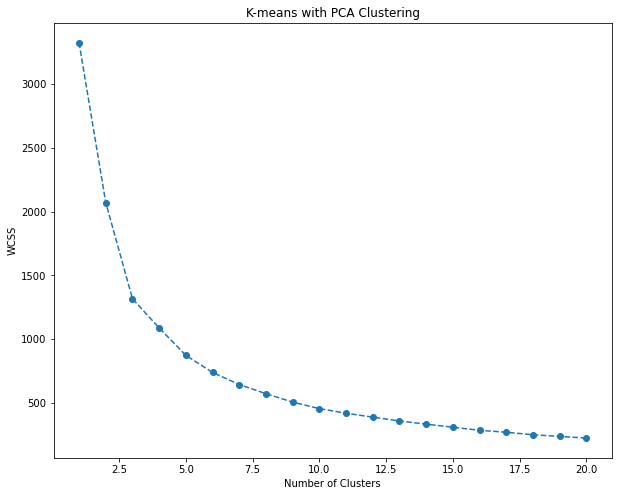

In [14]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

The elbow in our WCSS graph comes at the 3 cluster mark
We will keep a 3 cluster solution

In [15]:
#we run k means with 3 clusters
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [16]:
#fit our data into k-mean's pca model
kmeans_pca.fit(data_pca)

KMeans(n_clusters=3, random_state=42)

In [17]:
#df with original features and add PCA scores and assigned clusters
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(data_pca)], axis = 1)
#last column contains the pca k-means clustering labels
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [18]:
df_segm_pca_kmeans.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,PC1,PC2,Segment K-means PCA
0,67,1,2,1,4,0,1169,6,-0.197886,2.485862,2
1,22,0,2,1,0,1,5951,48,1.259781,-2.457687,1
2,49,1,1,1,0,3,2096,12,-0.826473,1.653489,2
3,45,1,2,0,0,0,7882,42,2.903654,-0.036714,1
4,53,1,2,0,0,0,4870,24,1.570848,1.090847,1


In [19]:
#map our clusters inside segments
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first',
                                                                              1:'second',
                                                                              2:'third'})

C:\Users\Evah\.conda\envs\tensrflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

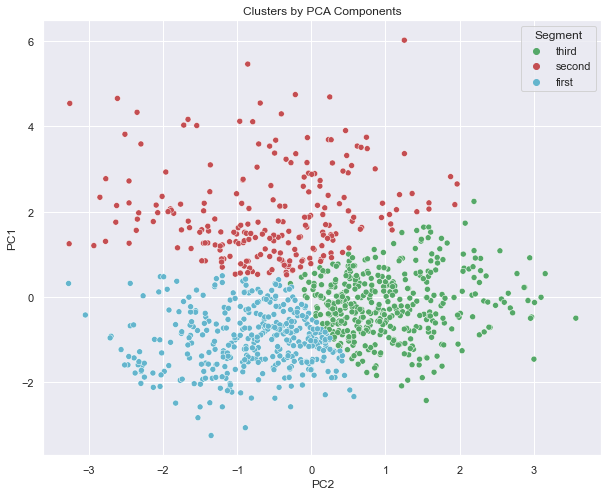

In [27]:
#plot data by PCA components. The Y axis is the first component, X axis is the second
x_axis = df_segm_pca_kmeans['PC2']
y_axis = df_segm_pca_kmeans['PC1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g', 'r', 'c'])
plt.title('Clusters by PCA Components')
plt.show